In [1]:
import numpy as np
import matplotlib.pyplot as plt

# activation function and its derivative.
sigma = lambda z : 1 / (1 + np.exp(-z))
d_sigma = lambda z : np.cosh(z/2)**(-2) / 4

#initialise the network
def network (n1 = 6, n2 = 7, random=np.random) :
    global W1, W2, W3, b1, b2, b3
    W1 = random.randn(n1, 1) / 2
    W2 = random.randn(n2, n1) / 2
    W3 = random.randn(2, n2) / 2
    b1 = random.randn(n1, 1) / 2
    b2 = random.randn(n2, 1) / 2
    b3 = random.randn(2, 1) / 2

#feed forward each activation to the next layer
def feed_forward(a0) :
    z1 = W1 @ a0 + b1
    a1 = sigma(z1)
    z2 = W2 @ a1 + b2
    a2 = sigma(z2)
    z3 = W3 @ a2 + b3
    a3 = sigma(z3)
    return a0, z1, a1, z2, a2, z3, a3
def cost(x, y) :
    return np.linalg.norm(network_function(x)[-1] - y)**2 / x.size

In [2]:
###################### back propagation

def jack_w3 (x, y) :
    # set up the activations.
    a0, z1, a1, z2, a2, z3, a3 = feed_forward(x)
    # dC/da3
    J = 2 * (a3 - y)
    #we multiply the result by the derivative of sigma, evaluated at z3.
    J = J * d_sigma(z3)
    # dz3/dW3 = a2
    # then we divid by the total no of x data to take the avg.
    J = J @ a2.T / x.size
    return J
def jack_b3 (x, y) :
    a0, z1, a1, z2, a2, z3, a3 = feed_forward(x)
    # two partial derivatives.
    J = 2 * (a3 - y)
    J = J * d_sigma(z3)
    # note dz3/db3 =1 => neglected.
    # sum all x
    J = np.sum(J, axis=1, keepdims=True) / x.size
    return J

In [3]:

def jack_w2 (x, y) :
    a0, z1, a1, z2, a2, z3, a3 = feed_forward(x)    
    J = 2 * (a3 - y)
    J = J * d_sigma(z3)
    J = (J.T @ W3).T
    J = J * d_sigma(z2)
    J = J @ a1.T / x.size
    return J

def jack_b2 (x, y) :
    a0, z1, a1, z2, a2, z3, a3 = feed_forward(x)
    J = 2 * (a3 - y)
    J =J*d_sigma(z3)
    J =(J.T@W3).T
    J =J*d_sigma(z2)
    J = np.sum(J, axis=1, keepdims=True) / x.size
    return J

In [4]:
def jack_w1 (x, y) :
    a0, z1, a1, z2, a2, z3, a3 = feed_forward(x)
    J =2 * (a3 - y)
    J =J*d_sigma(z3)
    J =(J.T@W3).T
    J =J*d_sigma(z2)
    J =(J.T@W2).T
    J =J*d_sigma(z1)
    J = J @ a0.T / x.size
    return J

def jack_b1 (x, y) :
    a0, z1, a1, z2, a2, z3, a3 = feed_forward(x)
    J =2 * (a3 - y)
    J =J*d_sigma(z3)
    J =(J.T@W3).T
    J =J*d_sigma(z2)
    J =(J.T@W2).T
    J =J*d_sigma(z1)
    J = np.sum(J, axis=1, keepdims=True) / x.size
    return J

In [12]:
%pylab notebook
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

def plot_training (x, y, iterations=10000, aggression=3.5, noise=1) :
    global W1, W2, W3, b1, b2, b3
    fig,ax = plt.subplots(figsize=(8, 8), dpi= 80)
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_aspect(1)

    xx = np.arange(0,1.01,0.01)
    yy = np.arange(0,1.01,0.01)
    X, Y = np.meshgrid(xx, yy)
    Z = ((X-0.5)**2 + (Y-1)**2)**(1/2) / (1.25)**(1/2)
    im = ax.imshow(Z, vmin=0, vmax=1, extent=[0, 1, 1, 0], cmap=blueMap)

    ax.plot(y[0],y[1], lw=1.5, color=green);

    while iterations>=0 :
        j_W1 = jack_w1(x, y) * (1 + np.random.randn() * noise)
        j_W2 = jack_w2(x, y) * (1 + np.random.randn() * noise)
        j_W3 = jack_w3(x, y) * (1 + np.random.randn() * noise)
        j_b1 = jack_b1(x, y) * (1 + np.random.randn() * noise)
        j_b2 = jack_b2(x, y) * (1 + np.random.randn() * noise)
        j_b3 = jack_b3(x, y) * (1 + np.random.randn() * noise)

        W1 = W1 - j_W1 * aggression
        W2 = W2 - j_W2 * aggression
        W3 = W3 - j_W3 * aggression
        b1 = b1 - j_b1 * aggression
        b2 = b2 - j_b2 * aggression
        b3 = b3 - j_b3 * aggression

        if (iterations%100==0) :
            nf = feed_forward(x)[-1]
            ax.plot(nf[0],nf[1], lw=2, color=magentaTrans);
        iterations -= 1

    nf = feed_forward(x)[-1]
    ax.plot(nf[0],nf[1], lw=2.5, color=orange);


def training_data (N = 100) :
    x = np.arange(0,1,1/N)
    y = np.array([
      16*np.sin(2*np.pi*x)**3,
      13*np.cos(2*np.pi*x) - 5*np.cos(2*2*np.pi*x) - 2*np.cos(3*2*np.pi*x)- np.cos(4*2*np.pi*x)
    ]
    ) / 20
    y = (y+1)/2
    x = np.reshape(x, (1, N))
    #y = np.reshape(y, (2, N))
    return x, y

def make_colormap(seq):
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)

magenta = (0xfc/255, 0x75/255, 0xdb/255) # Brighter magenta
magentaTrans = (0xfc/255, 0x75/255, 0xdb/255, 0.1) # Brighter Transparent magenta
orange = (218/255, 171/255, 115/255)
green = (175/255, 219/255, 133/255)
white = (240/255, 245/255, 250/255)
blue1 = (70/255, 101/255, 137/255)
blue2 = (122/255, 174/255, 215/255)

blueMap = make_colormap([blue2, blue1])

Populating the interactive namespace from numpy and matplotlib


In [13]:
x, y = training_data()
network()

<IPython.core.display.Javascript object>


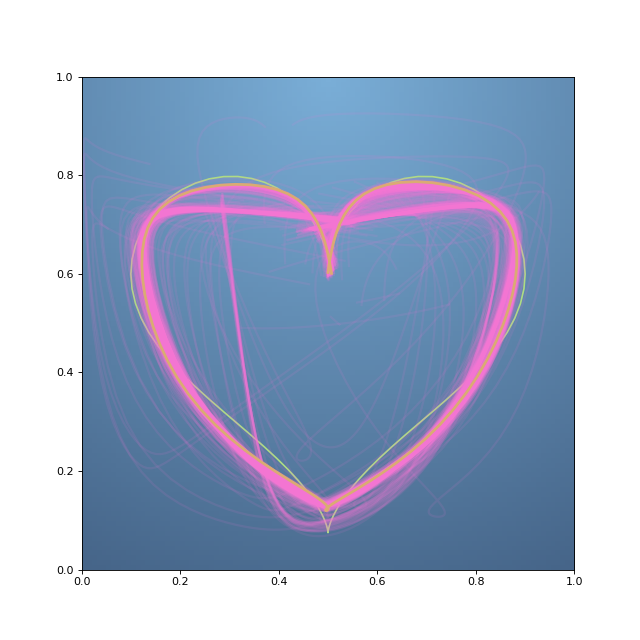

In [14]:
plot_training(x, y, iterations=50000, aggression=7, noise=1)